# Optimal new generation - summary

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format


Bad key legend.labelcolor in file style.txt, line 43 ('legend.labelcolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


### Notebook constants

In [16]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ["scenario_190", "scenario_191", "scenario_192", "scenario_193", "scenario_194", "scenario_195", "scenario_196", "scenario_197",
                 "scenario_198", "scenario_199"]
savefig = False
folder_to_save_results="results/"

figure_names={"scenario_190": 1, "scenario_191": 2, "scenario_192": 3, "scenario_193": 4, "scenario_194" : 5, "scenario_195": 6,
              "scenario_196" : 7, "scenario_197" : 8, "scenario_198" : 9, "scenario_199": 10}

In [17]:
columns = ["timepoint", "timestamp", "hours_per_year"]
fname = "timestamps.csv"
#tps = get_data(scenario_name, fname)
tps = get_data_sftp(hostname, username, scenario_name, fname)


In [18]:
# Read timepoints to aggregate data by year
columns = ["timepoint", "timestamp", "hours_per_year"]
fname = "timestamps.csv"
#tps = get_data(scenario_name, fname)
tps = get_data_sftp(hostname, username, scenario_name[0], fname)
del tps["scenario"]

# Read load data
fname = "loads.csv"
#load = get_data(scenario_name, fname, fpath="inputs")
load = get_data_sftp(hostname, username, scenario_name[0], fname, fpath="inputs")
del load["scenario"]

# Combine dataset
load = pd.merge(
    left=load,
    right=tps,
    left_on="TIMEPOINT",
    right_on="timepoint",
   # validate="many_to_one",
    how="left",
)
load["datetime"] = pd.to_datetime(load["timestamp"], format="%Y%m%d%H")
# Filter columns
load = load[["LOAD_ZONE", "zone_demand_mw", "hours_per_year", "datetime"]]



exception
timestamp in column


In [19]:
tps = tps[tps['period'] == 2050]
tps

,timepoint,timestamp,hours_per_year,timeseries,period
432,350931,2050011303,8.11,2050_2050-01-13,2050
433,350935,2050011307,8.11,2050_2050-01-13,2050
434,350939,2050011311,8.11,2050_2050-01-13,2050
435,350943,2050011315,8.11,2050_2050-01-13,2050
436,350947,2050011319,8.11,2050_2050-01-13,2050
...,...,...,...,...,...
571,359143,2050122107,8.11,2050_2050-12-21,2050
572,359147,2050122111,8.11,2050_2050-12-21,2050
573,359151,2050122115,8.11,2050_2050-12-21,2050
574,359155,2050122119,8.11,2050_2050-12-21,2050


In [22]:
load = load[load['datetime'].dt.year == 2050]
load

,LOAD_ZONE,zone_demand_mw,hours_per_year,datetime
432,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00
433,AZ_APS_E,366.58,8.11,2050-01-13 07:00:00
434,AZ_APS_E,355.36,8.11,2050-01-13 11:00:00
435,AZ_APS_E,424.10,8.11,2050-01-13 15:00:00
436,AZ_APS_E,320.42,8.11,2050-01-13 19:00:00
...,...,...,...,...
28795,WY_SW,325.77,8.11,2050-12-21 07:00:00
28796,WY_SW,277.57,8.11,2050-12-21 11:00:00
28797,WY_SW,291.76,8.11,2050-12-21 15:00:00
28798,WY_SW,269.41,8.11,2050-12-21 19:00:00


In [23]:
fname = "dispatch_zonal_annual_summary.csv"

#annual_summary = get_data(scenario_name, fname)
annual_summary = get_data_sftp(hostname, username, scenario_name, fname)
annual_summary = annual_summary[annual_summary['period']==2050]
annual_summary

,gen_tech,gen_load_zone,gen_energy_source,period,Energy_GWh_typical_yr,VariableOMCost_per_yr,DispatchEmissions_tCO2_per_typical_yr,DispatchEmissions_tNOx_per_typical_yr,DispatchEmissions_tSO2_per_typical_yr,DispatchEmissions_tCH4_per_typical_yr,tech_map,scenario
3,Battery_Storage,AZ_APS_E,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,scenario_190
7,Battery_Storage,AZ_APS_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,scenario_190
11,Battery_Storage,AZ_APS_SW,Electricity,2050,"5,935.20",0.00,0.00,0,0,0,Storage,scenario_190
15,Battery_Storage,AZ_NM_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,scenario_190
19,Battery_Storage,AZ_NW,Electricity,2050,"5,950.60",0.00,0.00,0,0,0,Storage,scenario_190
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Wind,WA_W,Wind,2050,736.31,0.00,0.00,0,0,0,Wind,scenario_199
3026,Wind,WY_NE,Wind,2050,985.84,0.00,0.00,0,0,0,Wind,scenario_199
3030,Wind,WY_NW,Wind,2050,"7,990.00",0.00,0.00,0,0,0,Wind,scenario_199
3034,Wind,WY_SE,Wind,2050,"112,620.00",0.00,0.00,0,0,0,Wind,scenario_199


## Data transformation

In [24]:
# Convert online capacity to GW
# Note this value is already scaled
annual_summary["Energy_TWh"] = annual_summary["Energy_GWh_typical_yr"] / 1e3  # GW to TW

# Scaled load
load["zone_demand_MW_scaled"] = load["zone_demand_mw"] * load["hours_per_year"]

In [25]:
total_load_MWh = load["zone_demand_MW_scaled"].sum()
total_load_TWh = total_load_MWh / 1e6
load

,LOAD_ZONE,zone_demand_mw,hours_per_year,datetime,zone_demand_MW_scaled
432,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00,"2,872.32"
433,AZ_APS_E,366.58,8.11,2050-01-13 07:00:00,"2,973.40"
434,AZ_APS_E,355.36,8.11,2050-01-13 11:00:00,"2,882.33"
435,AZ_APS_E,424.10,8.11,2050-01-13 15:00:00,"3,439.89"
436,AZ_APS_E,320.42,8.11,2050-01-13 19:00:00,"2,598.97"
...,...,...,...,...,...
28795,WY_SW,325.77,8.11,2050-12-21 07:00:00,"2,642.36"
28796,WY_SW,277.57,8.11,2050-12-21 11:00:00,"2,251.43"
28797,WY_SW,291.76,8.11,2050-12-21 15:00:00,"2,366.49"
28798,WY_SW,269.41,8.11,2050-12-21 19:00:00,"2,185.22"


## Annual generation in WECC

In [26]:
annual_summary = annual_summary.replace({"scenario": figure_names})
annual_summary = annual_summary.astype({'scenario':'int'})

In [27]:
annual_summary_by_scenario = annual_summary.pivot_table(
    index="scenario", columns="tech_map", values="Energy_TWh", aggfunc=np.sum
)
annual_summary_by_scenario = annual_summary_by_scenario#.fillna(0)
annual_summary_by_scenario.loc[:,'Total_TWh']=annual_summary_by_scenario.apply(lambda x: sum(x[c] for c in annual_summary_by_scenario.columns), axis=1)
annual_summary_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
1,14.50,0.00,0.00,0.00,237.84,42.76,294.32,2.71,546.66,211.94,0.04,7.55,436.83,"1,795.16"
2,14.50,0.00,0.00,0.00,237.84,42.76,287.19,2.71,541.77,211.05,0.04,18.51,438.30,"1,794.68"
3,14.50,0.00,0.00,0.00,237.84,42.76,279.48,2.71,528.13,205.06,0.04,37.18,439.59,"1,787.30"
4,14.50,0.00,0.00,0.00,237.84,42.76,279.42,2.71,516.52,201.37,0.04,51.84,434.43,"1,781.45"
5,14.50,0.00,0.00,0.00,237.84,42.76,279.88,2.71,518.17,200.86,0.04,57.23,426.71,"1,780.70"
6,14.71,0.00,0.00,0.00,237.84,42.76,255.35,2.71,559.14,216.23,0.04,13.02,460.11,"1,801.92"
7,14.50,0.00,0.00,0.00,237.84,42.76,265.44,2.71,533.84,207.05,0.04,23.81,461.35,"1,789.34"
8,14.50,0.00,0.00,0.00,237.84,42.76,278.77,2.71,518.50,200.94,0.04,38.16,446.94,"1,781.17"
9,14.22,0.00,0.00,0.00,237.84,42.76,294.10,2.71,511.99,200.04,0.04,51.90,424.34,"1,779.95"


In [28]:
sc= list(annual_summary_by_scenario.index)
plot_1=sc[0:int(round(len(sc)/2,0))]
plot_2=sc[int(round(len(sc)/2,0)):int(len(sc))]
group_1 = annual_summary_by_scenario.loc[plot_1,:]
group_2 = annual_summary_by_scenario.loc[plot_2,:]

# sc= list(annual_summary_by_scenario.index)
# p0 = sc[0]
# plot_1=sc[0:int(round(len(sc)/2,0))]
# plot_2=[p0]+ sc[int(round(len(sc)/2,0)):int(len(sc))]
# group_1 = annual_summary_by_scenario.loc[plot_1,:]
# group_2 = annual_summary_by_scenario.loc[plot_2,:]

In [29]:
group_1

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
1,14.50,0.00,0.00,0.00,237.84,42.76,294.32,2.71,546.66,211.94,0.04,7.55,436.83,"1,795.16"
2,14.50,0.00,0.00,0.00,237.84,42.76,287.19,2.71,541.77,211.05,0.04,18.51,438.30,"1,794.68"
3,14.50,0.00,0.00,0.00,237.84,42.76,279.48,2.71,528.13,205.06,0.04,37.18,439.59,"1,787.30"
4,14.50,0.00,0.00,0.00,237.84,42.76,279.42,2.71,516.52,201.37,0.04,51.84,434.43,"1,781.45"
5,14.50,0.00,0.00,0.00,237.84,42.76,279.88,2.71,518.17,200.86,0.04,57.23,426.71,"1,780.70"


<ipython-input-106-2c3f591a31fd>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_GW
scenario,,,,,,,,,,,,,,
1,14.50,0.00,0.00,0.00,237.84,42.76,294.32,2.71,546.66,211.94,0.04,7.55,436.83,"1,795.16"
2,14.50,0.00,0.00,0.00,237.84,42.76,287.19,2.71,541.77,211.05,0.04,18.51,438.30,"1,794.68"
3,14.50,0.00,0.00,0.00,237.84,42.76,279.48,2.71,528.13,205.06,0.04,37.18,439.59,"1,787.30"
4,14.50,0.00,0.00,0.00,237.84,42.76,279.42,2.71,516.52,201.37,0.04,51.84,434.43,"1,781.45"
5,14.50,0.00,0.00,0.00,237.84,42.76,279.88,2.71,518.17,200.86,0.04,57.23,426.71,"1,780.70"
6,14.71,0.00,0.00,0.00,237.84,42.76,255.35,2.71,559.14,216.23,0.04,13.02,460.11,"1,801.92"
7,14.50,0.00,0.00,0.00,237.84,42.76,265.44,2.71,533.84,207.05,0.04,23.81,461.35,"1,789.34"
8,14.50,0.00,0.00,0.00,237.84,42.76,278.77,2.71,518.50,200.94,0.04,38.16,446.94,"1,781.17"
9,14.22,0.00,0.00,0.00,237.84,42.76,294.10,2.71,511.99,200.04,0.04,51.90,424.34,"1,779.95"


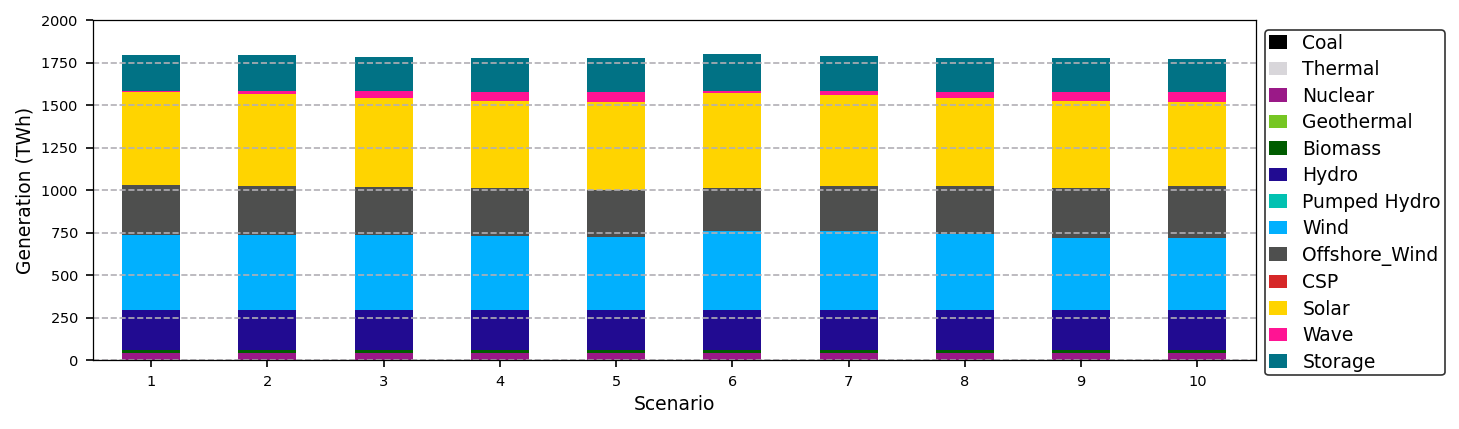

In [106]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = annual_summary_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in WECC.png", transparent=False)

#Rename for spaces purposes
data=annual_summary_by_scenario.rename(index=figure_names,inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC.tex",index=True,
                                  float_format='%.1f',
                                  caption="Annual generation (TWh) in WECC")

#Show dataframe
annual_summary_by_scenario

<ipython-input-30-06e91a908df8>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
1,14.50,0.00,0.00,0.00,237.84,42.76,294.32,2.71,546.66,211.94,0.04,7.55,436.83,"1,795.16"
2,14.50,0.00,0.00,0.00,237.84,42.76,287.19,2.71,541.77,211.05,0.04,18.51,438.30,"1,794.68"
3,14.50,0.00,0.00,0.00,237.84,42.76,279.48,2.71,528.13,205.06,0.04,37.18,439.59,"1,787.30"
4,14.50,0.00,0.00,0.00,237.84,42.76,279.42,2.71,516.52,201.37,0.04,51.84,434.43,"1,781.45"
5,14.50,0.00,0.00,0.00,237.84,42.76,279.88,2.71,518.17,200.86,0.04,57.23,426.71,"1,780.70"


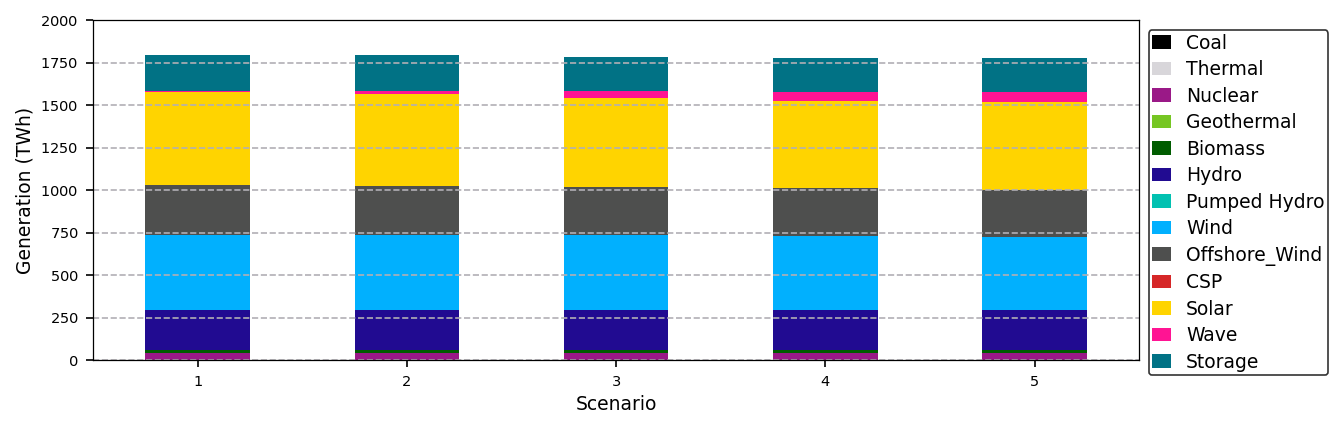

In [30]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_1[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 190-194).png", transparent=False)

#Rename for spaces purposes
data=annual_summary_by_scenario.rename(index=figure_names,inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) in WECC (scenarios 190-194)")

#Show dataframe
group_1

In [31]:
fig.savefig('gen_scen_1to5.svg', format='svg', dpi=1200)

<ipython-input-108-89926369309d>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_GW
scenario,,,,,,,,,,,,,,
6,14.71,0.00,0.00,0.00,237.84,42.76,255.35,2.71,559.14,216.23,0.04,13.02,460.11,"1,801.92"
7,14.50,0.00,0.00,0.00,237.84,42.76,265.44,2.71,533.84,207.05,0.04,23.81,461.35,"1,789.34"
8,14.50,0.00,0.00,0.00,237.84,42.76,278.77,2.71,518.50,200.94,0.04,38.16,446.94,"1,781.17"
9,14.22,0.00,0.00,0.00,237.84,42.76,294.10,2.71,511.99,200.04,0.04,51.90,424.34,"1,779.95"
10,14.13,0.00,0.00,0.00,237.84,42.76,307.98,2.71,495.88,193.37,0.04,56.64,419.18,"1,770.54"


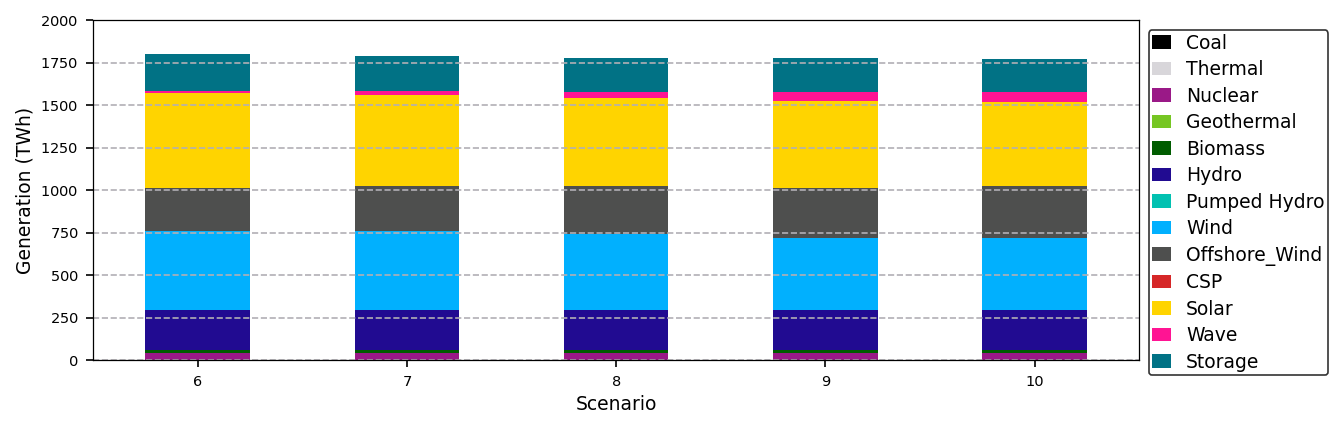

In [108]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_2[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 195-199).png", transparent=False)

#Rename for spaces purposes
data=annual_summary_by_scenario.rename(index=figure_names,inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) in WECC (scenarios 195-199)")

#Show dataframe
group_2

In [109]:
techs = annual_summary['tech_map'].unique()
annual_summary_by_scenario_percentage = annual_summary_by_scenario.copy()
for t in techs:
    annual_summary_by_scenario_percentage.loc[:,t] = annual_summary_by_scenario_percentage.apply(lambda x:x[t]*100/x['Total_GW'], axis=1)
annual_summary_by_scenario_percentage.drop(columns='Total_GW', axis=1, inplace=True)

annual_summary_by_scenario_percentage.loc[:,'Total']=annual_summary_by_scenario_percentage.apply(lambda x: sum(x[c] for c in annual_summary_by_scenario_percentage.columns), axis=1)
annual_summary_by_scenario_percentage.T.to_latex(folder_to_save_results+"Annual generation (percentage) in WECC.tex",index=True,
                                  float_format='%.1f',
                                  caption="Annual generation (percentage) in WECC")
annual_summary_by_scenario_percentage

<ipython-input-109-770d8844ae31>:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  annual_summary_by_scenario_percentage.T.to_latex(folder_to_save_results+"Annual generation (percentage) in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total
scenario,,,,,,,,,,,,,,
1,0.81,0.00,0.00,0.00,13.25,2.38,16.40,0.15,30.45,11.81,0.00,0.42,24.33,100.00
2,0.81,0.00,0.00,0.00,13.25,2.38,16.00,0.15,30.19,11.76,0.00,1.03,24.42,100.00
3,0.81,0.00,0.00,0.00,13.31,2.39,15.64,0.15,29.55,11.47,0.00,2.08,24.60,100.00
4,0.81,0.00,0.00,0.00,13.35,2.40,15.69,0.15,28.99,11.30,0.00,2.91,24.39,100.00
5,0.81,0.00,0.00,0.00,13.36,2.40,15.72,0.15,29.10,11.28,0.00,3.21,23.96,100.00
6,0.82,0.00,0.00,0.00,13.20,2.37,14.17,0.15,31.03,12.00,0.00,0.72,25.53,100.00
7,0.81,0.00,0.00,0.00,13.29,2.39,14.83,0.15,29.83,11.57,0.00,1.33,25.78,100.00
8,0.81,0.00,0.00,0.00,13.35,2.40,15.65,0.15,29.11,11.28,0.00,2.14,25.09,100.00
9,0.80,0.00,0.00,0.00,13.36,2.40,16.52,0.15,28.76,11.24,0.00,2.92,23.84,100.00


## Annual generation in California

In [63]:
annual_gen_ca=annual_summary[annual_summary.gen_load_zone.str.startswith('CA_')]

annual_gen_ca_by_scenario = annual_gen_ca.pivot_table(
    index="scenario", columns="tech_map", values="Energy_TWh", aggfunc=np.sum )

#Sort the pivot table by index according to the scenario_name
annual_gen_ca_by_scenario.columns = annual_gen_ca_by_scenario.columns.add_categories(['indexNumber'])
annual_gen_ca_by_scenario['indexNumber']=[scenario_name.index(annual_gen_ca_by_scenario.index[i]) for i in range(0,len(scenario_name))]
annual_gen_ca_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del annual_gen_ca_by_scenario['indexNumber']
annual_gen_ca_by_scenario.columns = annual_gen_ca_by_scenario.columns.add_categories(['total_TWh'])
annual_gen_ca_by_scenario['total_TWh']=[annual_gen_ca_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]


ValueError: '1' is not in list

In [ ]:
load_ca=load[load.LOAD_ZONE.str.startswith('CA_')]

total_load_ca_MWh = load_ca["zone_demand_MW_scaled"].sum()

total_load_ca_TWh = total_load_ca_MWh / 1e6

In [ ]:
annual_gen_ca_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario,,,,,,,,,,,,,,
scenario_190,6.04,0.00,0.00,0.00,29.85,0.00,225.39,1.85,208.19,92.09,0.00,6.16,10.84,580.41
scenario_191,6.04,0.00,0.00,0.00,29.85,0.00,222.63,1.85,202.89,90.46,0.00,12.94,11.65,578.29
scenario_192,6.04,0.00,0.00,0.00,29.85,0.00,220.79,1.85,193.94,88.28,0.00,22.22,11.96,574.93
scenario_193,6.04,0.00,0.00,0.00,29.85,0.00,221.31,1.85,192.58,86.22,0.00,30.82,13.34,581.99
scenario_194,6.04,0.00,0.00,0.00,29.85,0.00,219.84,1.85,191.70,84.18,0.00,34.48,11.93,579.87
scenario_195,6.25,0.00,0.00,0.00,29.85,0.00,209.08,1.85,216.53,97.08,0.00,9.48,13.09,583.21
scenario_196,6.04,0.00,0.00,0.00,29.85,0.00,214.35,1.85,202.29,90.38,0.00,16.57,14.13,575.46
scenario_197,6.04,0.00,0.00,0.00,29.85,0.00,222.57,1.85,191.68,86.47,0.00,24.23,12.55,575.24
scenario_198,6.04,0.00,0.00,0.00,29.85,0.00,228.40,1.85,188.71,83.86,0.00,30.91,11.90,581.53


In [ ]:
total_load_ca_TWh

491.3020652943205

In [ ]:
[total_load_ca_TWh] * len(scenario_name)

[491.3020652943205,
 491.3020652943205,
 491.3020652943205,
 491.3020652943205,
 491.3020652943205,
 491.3020652943205,
 491.3020652943205,
 491.3020652943205,
 491.3020652943205,
 491.3020652943205]

In [ ]:
load_line = pd.DataFrame(scenario_name)
load_line['load'] = total_load_ca_TWh
load_line.rename(columns={0:'scenario'},inplace=True)
load_line

,scenario,load
0,scenario_190,491.30
1,scenario_191,491.30
2,scenario_192,491.30
3,scenario_193,491.30
4,scenario_194,491.30
5,scenario_195,491.30
6,scenario_196,491.30
7,scenario_197,491.30
8,scenario_198,491.30
9,scenario_199,491.30


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario,,,,,,,,,,,,,,
scenario_190,6.04,0.00,0.00,0.00,29.85,0.00,225.39,1.85,208.19,92.09,0.00,6.16,10.84,580.41
scenario_191,6.04,0.00,0.00,0.00,29.85,0.00,222.63,1.85,202.89,90.46,0.00,12.94,11.65,578.29
scenario_192,6.04,0.00,0.00,0.00,29.85,0.00,220.79,1.85,193.94,88.28,0.00,22.22,11.96,574.93
scenario_193,6.04,0.00,0.00,0.00,29.85,0.00,221.31,1.85,192.58,86.22,0.00,30.82,13.34,581.99
scenario_194,6.04,0.00,0.00,0.00,29.85,0.00,219.84,1.85,191.70,84.18,0.00,34.48,11.93,579.87
scenario_195,6.25,0.00,0.00,0.00,29.85,0.00,209.08,1.85,216.53,97.08,0.00,9.48,13.09,583.21
scenario_196,6.04,0.00,0.00,0.00,29.85,0.00,214.35,1.85,202.29,90.38,0.00,16.57,14.13,575.46
scenario_197,6.04,0.00,0.00,0.00,29.85,0.00,222.57,1.85,191.68,86.47,0.00,24.23,12.55,575.24
scenario_198,6.04,0.00,0.00,0.00,29.85,0.00,228.40,1.85,188.71,83.86,0.00,30.91,11.90,581.53


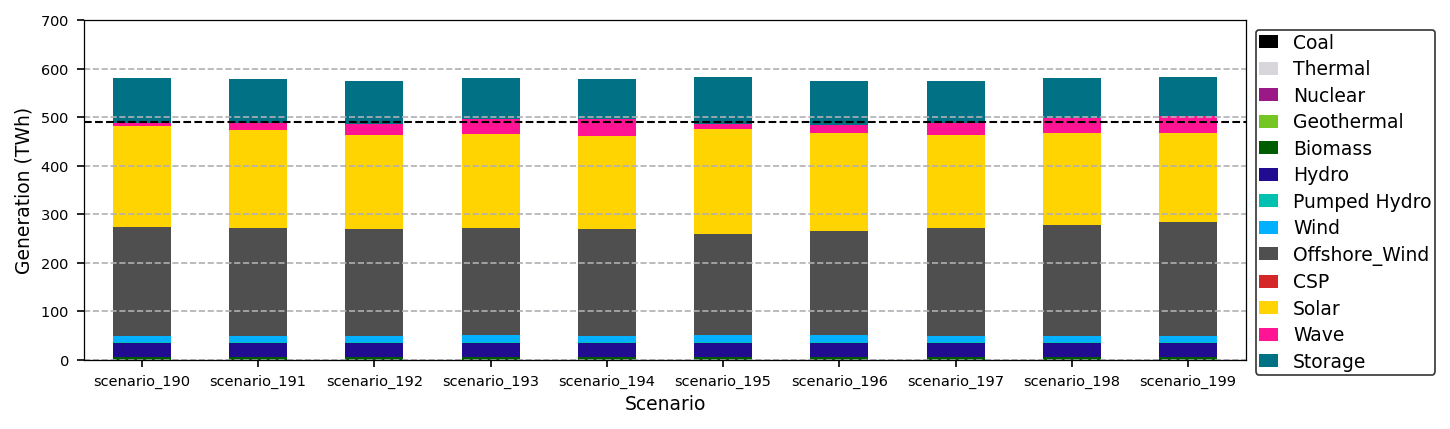

In [ ]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = annual_gen_ca_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

plt.axhline(y=total_load_ca_TWh, ls="--", color="k", lw=1)
#[total_load_ca_TWh].plot(kind='line', marker='*', color='black', ms=10)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in California.png", transparent=False)

#Rename for spaces purposes
data=annual_gen_ca_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) in California")

#Show dataframe
annual_gen_ca_by_scenario

In [ ]:
#Computing percentages
x=np.zeros((len(scenario_name),len(annual_gen_ca_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(annual_gen_ca_by_scenario.columns)):
      x[c,tec]=100*annual_gen_ca_by_scenario.loc[scenario_name[c],annual_gen_ca_by_scenario.columns[tec]]/annual_gen_ca_by_scenario.loc[scenario_name[c],annual_gen_ca_by_scenario.columns[len(annual_gen_ca_by_scenario.columns)-1]]

annual_gen_ca_by_scenario_percentage=pd.DataFrame(x,columns=annual_gen_ca_by_scenario.columns,index=[scenario_name])

data=annual_gen_ca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Annual generation (percentage) in California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (percentage) in California")
annual_gen_ca_by_scenario_percentage

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario_190,1.04,0.00,0.00,0.00,5.14,0.00,38.83,0.32,35.87,15.87,0.00,1.06,1.87,100.00
scenario_191,1.04,0.00,0.00,0.00,5.16,0.00,38.50,0.32,35.08,15.64,0.00,2.24,2.01,100.00
scenario_192,1.05,0.00,0.00,0.00,5.19,0.00,38.40,0.32,33.73,15.36,0.00,3.86,2.08,100.00
scenario_193,1.04,0.00,0.00,0.00,5.13,0.00,38.03,0.32,33.09,14.81,0.00,5.29,2.29,100.00
scenario_194,1.04,0.00,0.00,0.00,5.15,0.00,37.91,0.32,33.06,14.52,0.00,5.95,2.06,100.00
scenario_195,1.07,0.00,0.00,0.00,5.12,0.00,35.85,0.32,37.13,16.65,0.00,1.62,2.24,100.00
scenario_196,1.05,0.00,0.00,0.00,5.19,0.00,37.25,0.32,35.15,15.71,0.00,2.88,2.45,100.00
scenario_197,1.05,0.00,0.00,0.00,5.19,0.00,38.69,0.32,33.32,15.03,0.00,4.21,2.18,100.00
scenario_198,1.04,0.00,0.00,0.00,5.13,0.00,39.28,0.32,32.45,14.42,0.00,5.32,2.05,100.00
scenario_199,1.03,0.00,0.00,0.00,5.11,0.00,40.17,0.32,31.46,14.00,0.00,5.90,2.01,100.00


## Annual generation out of California

In [ ]:
zones_ca=annual_summary[annual_summary ["scenario"].isin([scenario_name[0]])]
zones_ca=list(zones_ca[zones_ca.gen_load_zone.str.startswith('CA_')].gen_load_zone)
annual_gen_outca=annual_summary[~annual_summary["gen_load_zone"].isin(zones_ca)]
annual_gen_outca

,gen_tech,gen_load_zone,gen_energy_source,period,Energy_GWh_typical_yr,VariableOMCost_per_yr,DispatchEmissions_tCO2_per_typical_yr,DispatchEmissions_tNOx_per_typical_yr,DispatchEmissions_tSO2_per_typical_yr,DispatchEmissions_tCH4_per_typical_yr,tech_map,scenario,Energy_TWh
3,Battery_Storage,AZ_APS_E,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,scenario_190,0.00
7,Battery_Storage,AZ_APS_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,scenario_190,0.00
11,Battery_Storage,AZ_APS_SW,Electricity,2050,"5,935.20",0.00,0.00,0,0,0,Storage,scenario_190,5.94
15,Battery_Storage,AZ_NM_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,scenario_190,0.00
19,Battery_Storage,AZ_NW,Electricity,2050,"5,950.60",0.00,0.00,0,0,0,Storage,scenario_190,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Wind,WA_W,Wind,2050,736.31,0.00,0.00,0,0,0,Wind,scenario_199,0.74
3026,Wind,WY_NE,Wind,2050,985.84,0.00,0.00,0,0,0,Wind,scenario_199,0.99
3030,Wind,WY_NW,Wind,2050,"7,990.00",0.00,0.00,0,0,0,Wind,scenario_199,7.99
3034,Wind,WY_SE,Wind,2050,"112,620.00",0.00,0.00,0,0,0,Wind,scenario_199,112.62


In [ ]:
annual_gen_outca_by_scenario = annual_gen_outca.pivot_table(
    index="scenario", columns="tech_map", values="Energy_TWh", aggfunc=np.sum )

#Sort the pivot table by index according to the scenario_name
annual_gen_outca_by_scenario.columns = annual_gen_outca_by_scenario.columns.add_categories(['indexNumber'])
annual_gen_outca_by_scenario['indexNumber']=[scenario_name.index(annual_gen_outca_by_scenario.index[i]) for i in range(0,len(scenario_name))]
annual_gen_outca_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del annual_gen_outca_by_scenario['indexNumber']
annual_gen_outca_by_scenario.columns = annual_gen_outca_by_scenario.columns.add_categories(['total_TWh'])
annual_gen_outca_by_scenario['total_TWh']=[annual_gen_outca_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario,,,,,,,,,,,,,,
scenario_190,8.47,0.00,0.00,0.00,208.00,42.76,68.93,0.86,338.47,119.85,0.04,1.39,425.99,"1,214.75"
scenario_191,8.47,0.00,0.00,0.00,208.00,42.76,64.56,0.86,338.88,120.59,0.04,5.58,426.66,"1,216.39"
scenario_192,8.47,0.00,0.00,0.00,208.00,42.76,58.69,0.86,334.19,116.78,0.04,14.97,427.63,"1,212.37"
scenario_193,8.47,0.00,0.00,0.00,208.00,42.76,58.12,0.86,323.94,115.15,0.04,21.02,421.09,"1,199.45"
scenario_194,8.47,0.00,0.00,0.00,208.00,42.76,60.04,0.86,326.47,116.68,0.04,22.74,414.78,"1,200.83"
scenario_195,8.47,0.00,0.00,0.00,208.00,42.76,46.27,0.86,342.61,119.15,0.04,3.54,447.01,"1,218.71"
scenario_196,8.47,0.00,0.00,0.00,208.00,42.76,51.08,0.86,331.54,116.67,0.04,7.24,447.23,"1,213.88"
scenario_197,8.47,0.00,0.00,0.00,208.00,42.76,56.20,0.86,326.82,114.47,0.04,13.93,434.39,"1,205.93"
scenario_198,8.18,0.00,0.00,0.00,208.00,42.76,65.70,0.86,323.27,116.18,0.04,20.98,412.44,"1,198.42"


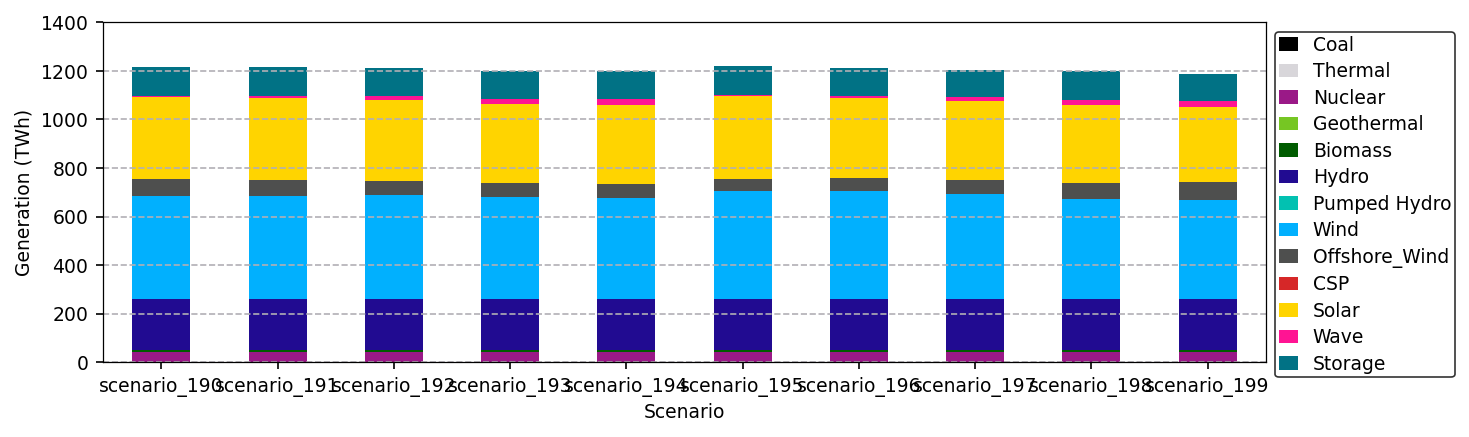

In [ ]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = annual_gen_outca_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) out of California.png", transparent=False)

#Rename for spaces purposes
data=annual_gen_outca_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) out of California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) out of California")

#Show dataframe
annual_gen_outca_by_scenario

In [ ]:
#Computing percentages
x=np.zeros((len(scenario_name),len(annual_gen_outca_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(annual_gen_outca_by_scenario.columns)):
      x[c,tec]=100*annual_gen_outca_by_scenario.loc[scenario_name[c],annual_gen_outca_by_scenario.columns[tec]]/annual_gen_outca_by_scenario.loc[scenario_name[c],annual_gen_outca_by_scenario.columns[len(annual_gen_outca_by_scenario.columns)-1]]

annual_gen_outca_by_scenario_percentage=pd.DataFrame(x,columns=annual_gen_outca_by_scenario.columns,index=[scenario_name])

data=annual_gen_outca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Annual generation (percentage) out of California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (percentage) out of California")
annual_gen_outca_by_scenario_percentage

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario_190,0.70,0.00,0.00,0.00,17.12,3.52,5.67,0.07,27.86,9.87,0.00,0.11,35.07,100.00
scenario_191,0.70,0.00,0.00,0.00,17.10,3.52,5.31,0.07,27.86,9.91,0.00,0.46,35.08,100.00
scenario_192,0.70,0.00,0.00,0.00,17.16,3.53,4.84,0.07,27.56,9.63,0.00,1.23,35.27,100.00
scenario_193,0.71,0.00,0.00,0.00,17.34,3.57,4.85,0.07,27.01,9.60,0.00,1.75,35.11,100.00
scenario_194,0.71,0.00,0.00,0.00,17.32,3.56,5.00,0.07,27.19,9.72,0.00,1.89,34.54,100.00
scenario_195,0.69,0.00,0.00,0.00,17.07,3.51,3.80,0.07,28.11,9.78,0.00,0.29,36.68,100.00
scenario_196,0.70,0.00,0.00,0.00,17.13,3.52,4.21,0.07,27.31,9.61,0.00,0.60,36.84,100.00
scenario_197,0.70,0.00,0.00,0.00,17.25,3.55,4.66,0.07,27.10,9.49,0.00,1.15,36.02,100.00
scenario_198,0.68,0.00,0.00,0.00,17.36,3.57,5.48,0.07,26.97,9.69,0.00,1.75,34.42,100.00
scenario_199,0.68,0.00,0.00,0.00,17.53,3.60,6.19,0.07,26.31,9.41,0.00,1.87,34.33,100.00
